<a href="https://colab.research.google.com/github/pouyaramezani/ICT/blob/master/comparing_multiple_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Comparing Multiple Image Tool (CMIT), simply find the edges in several images and draw them in one image to make comparition of positions and find out drift easier.  
  
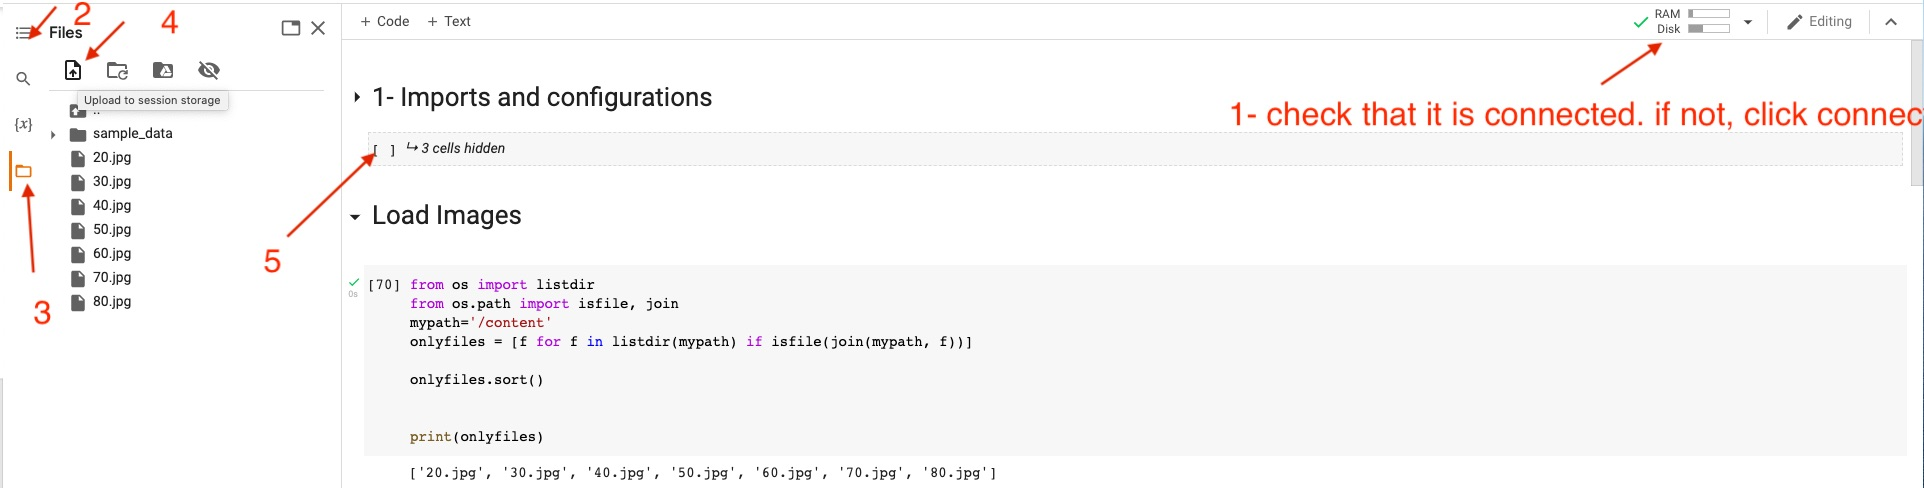

# 1- Imports and configurations








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import math
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 200
!pip install opencv-contrib-python==4.4.0.44
import cv2 as cv
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Canny Parameters](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

In [ ]:
# Configration
GUASSIAN_KERNEL_SIZE=(3,3) 
CANNY_MIN_THRESHOLD = 100 #@param {type: "slider", min: 0, max: 1000}
CANNY_MAX_THRESHOLD =200  #@param {type: "slider", min: 0, max: 1000}
MIN_ACCEPTABLE_CONTOUR_LENGTH=1000



# Load Images

In [ ]:
from os import listdir
from os.path import isfile, join
mypath='/content'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles.sort()


print(onlyfiles)

['20.jpg', '30.jpg', '40.jpg', '50.jpg', '60.jpg', '70.jpg', '80.jpg']


# 4- Preparing images

In [ ]:
img_files = []
filtered_img_files = []
for file_name in onlyfiles:
  if file_name[-3:] not in ['jpg','bmp','png','JPG','BMP','PNG']:
    print("{file_name} is not an image file".format(file_name)) 
    continue
  img_files.append(cv.imread(file_name,0))

for img_file in img_files:
  filtered_img_files.append(cv.GaussianBlur(img_file,GUASSIAN_KERNEL_SIZE,0))

#5- Find edges

In [ ]:
edged_images=[]
for filtered_img in filtered_img_files:
  
  edged_image = cv.Canny(filtered_img,CANNY_MIN_THRESHOLD,CANNY_MAX_THRESHOLD)
  edged_image = cv.dilate(edged_image, None, iterations=1)
  edged_image = cv.erode(edged_image, None, iterations=1)
  edged_images.append(edged_image)


# 5- Show original and edges side by side
Expand the cell to see the edge find results. 

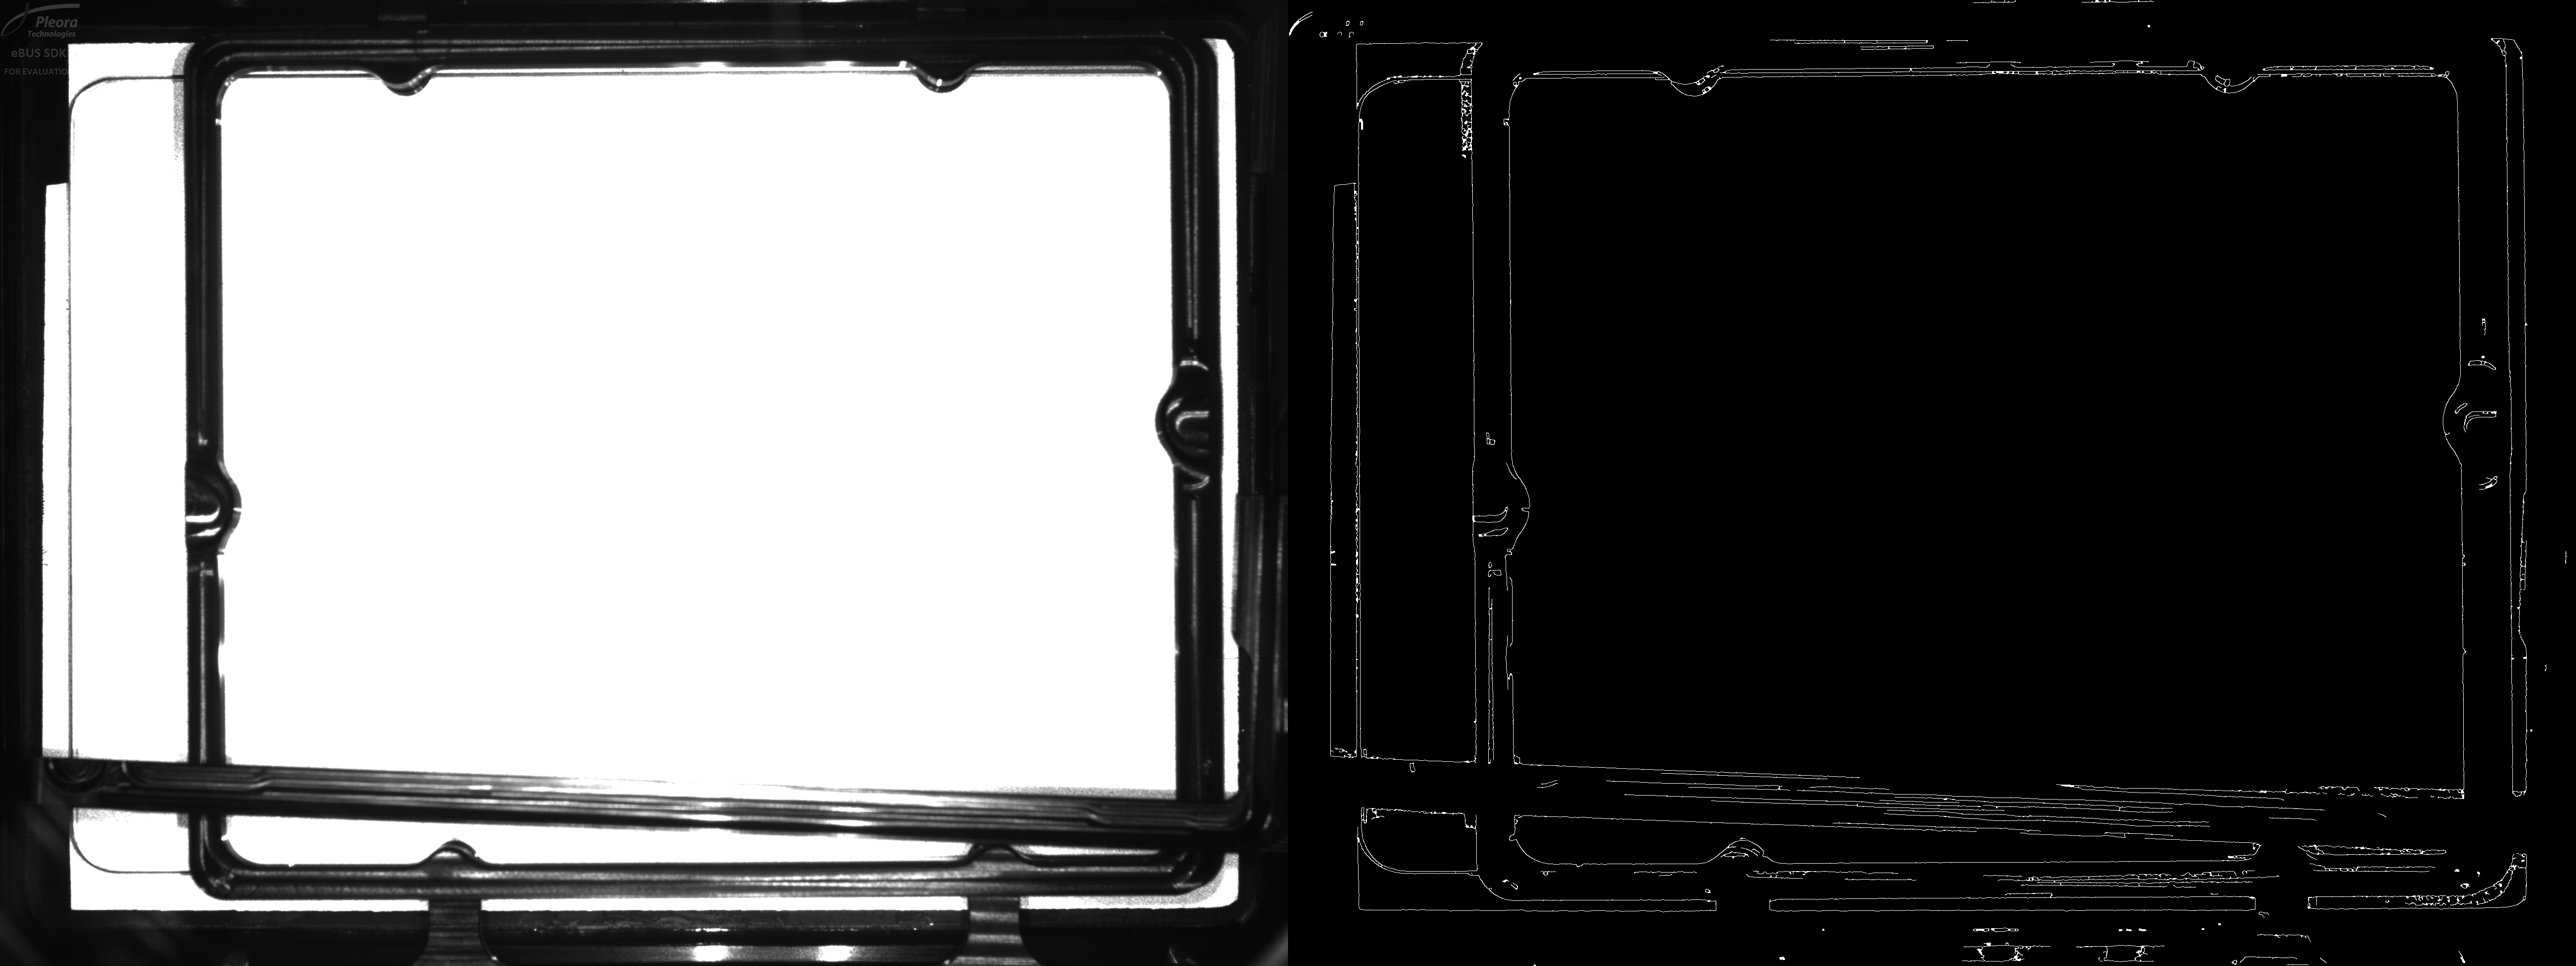

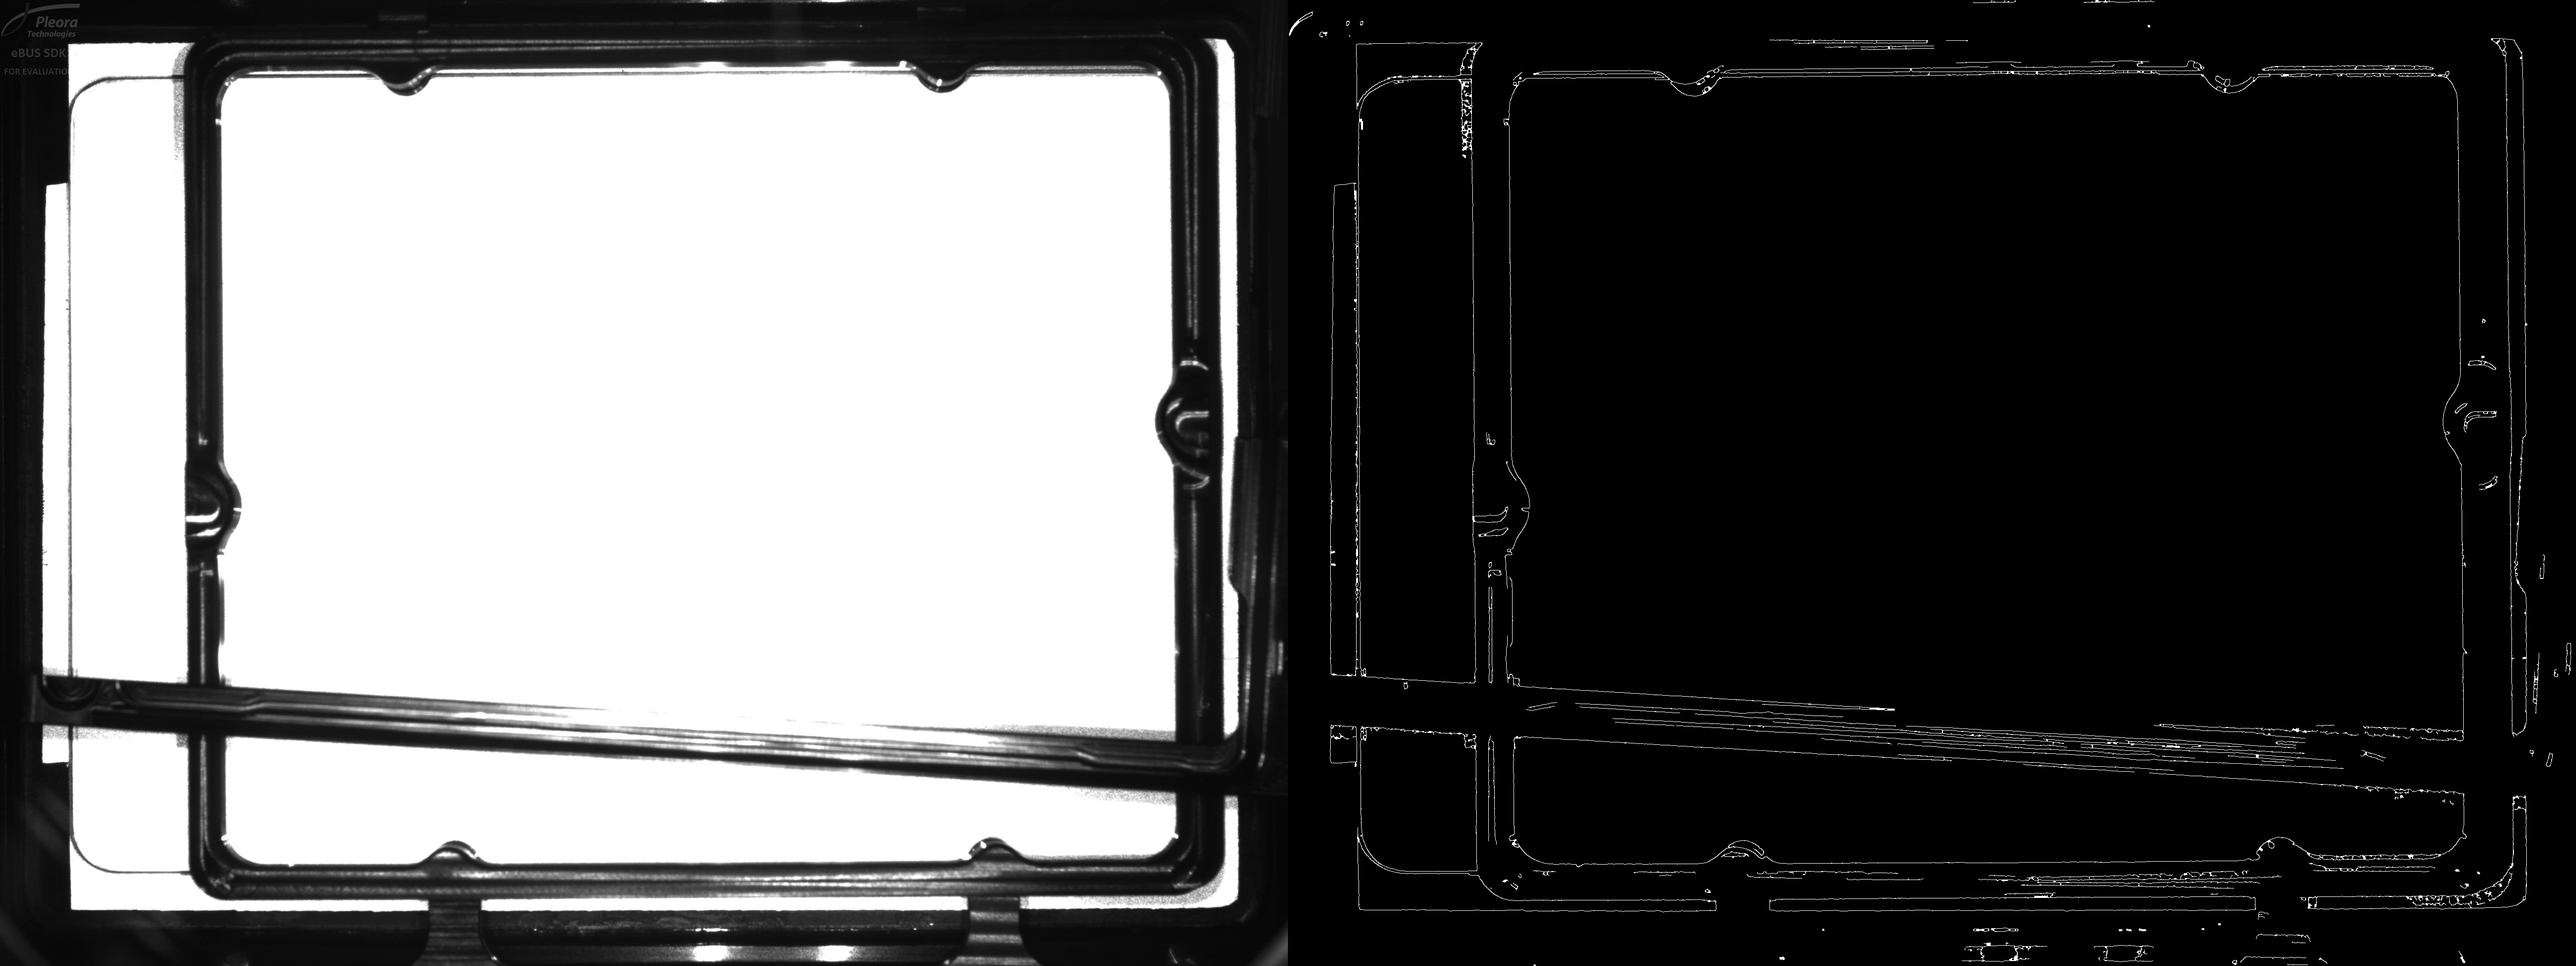

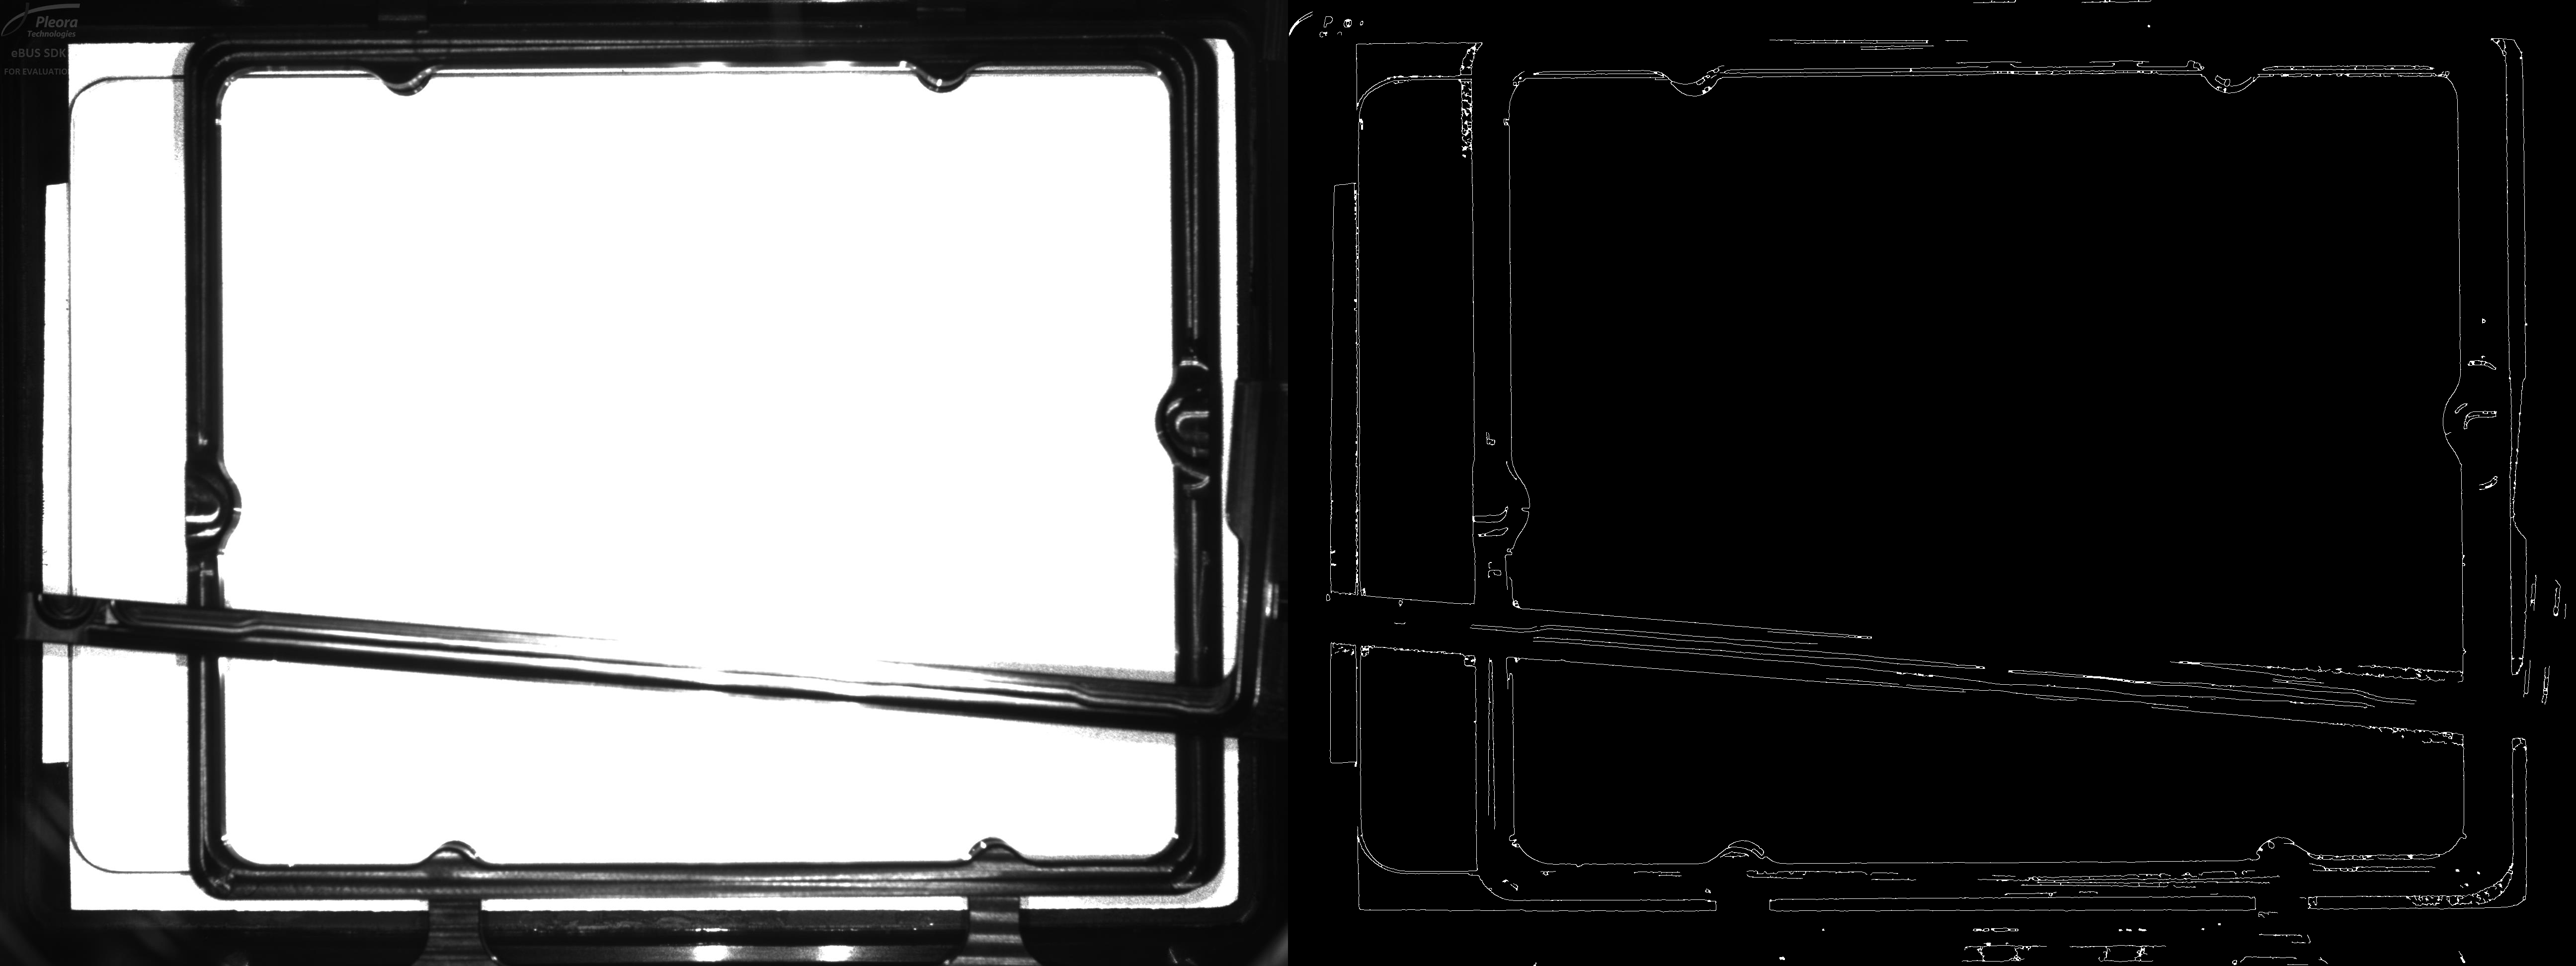

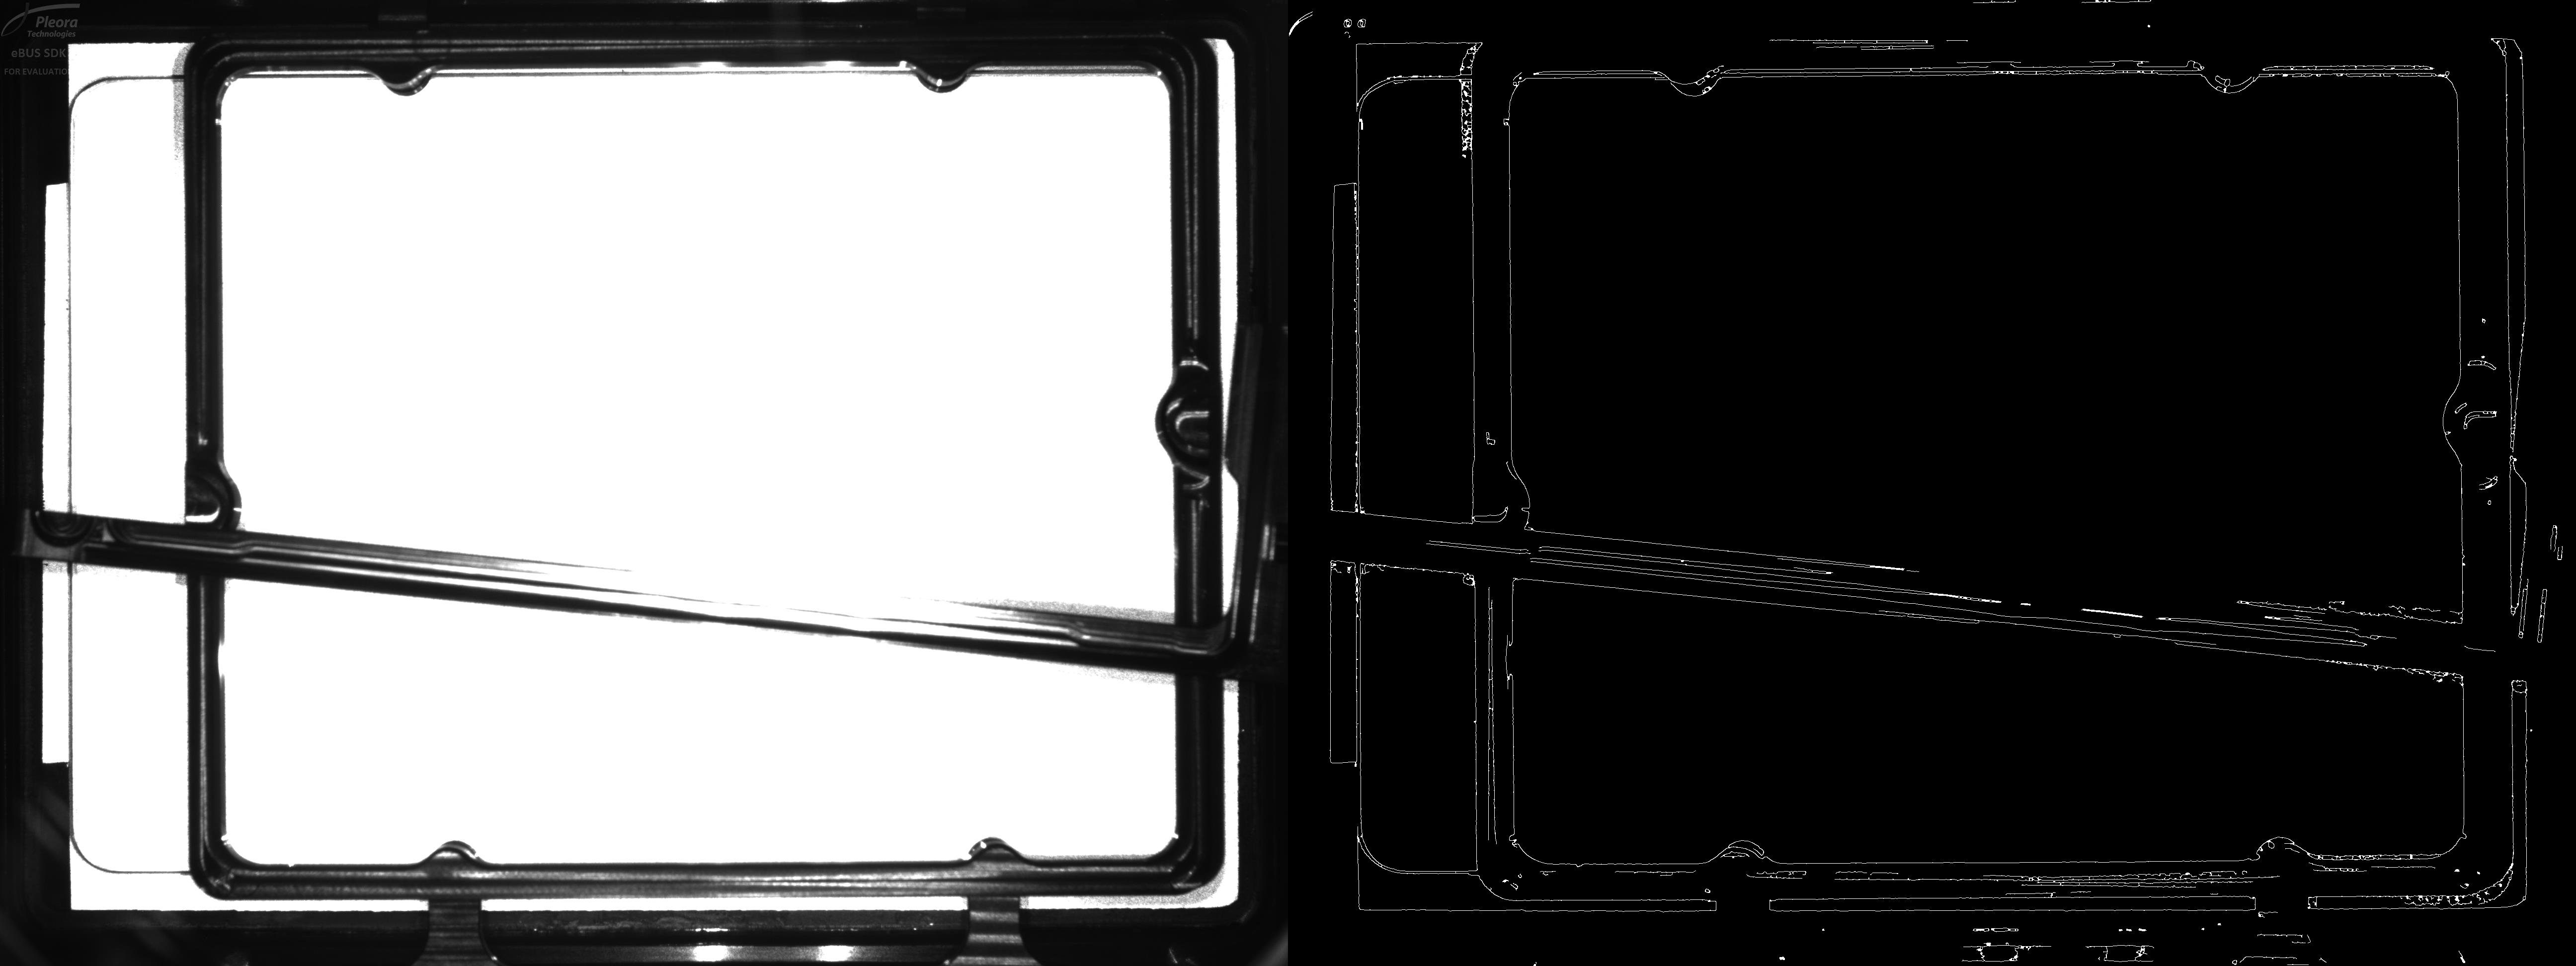

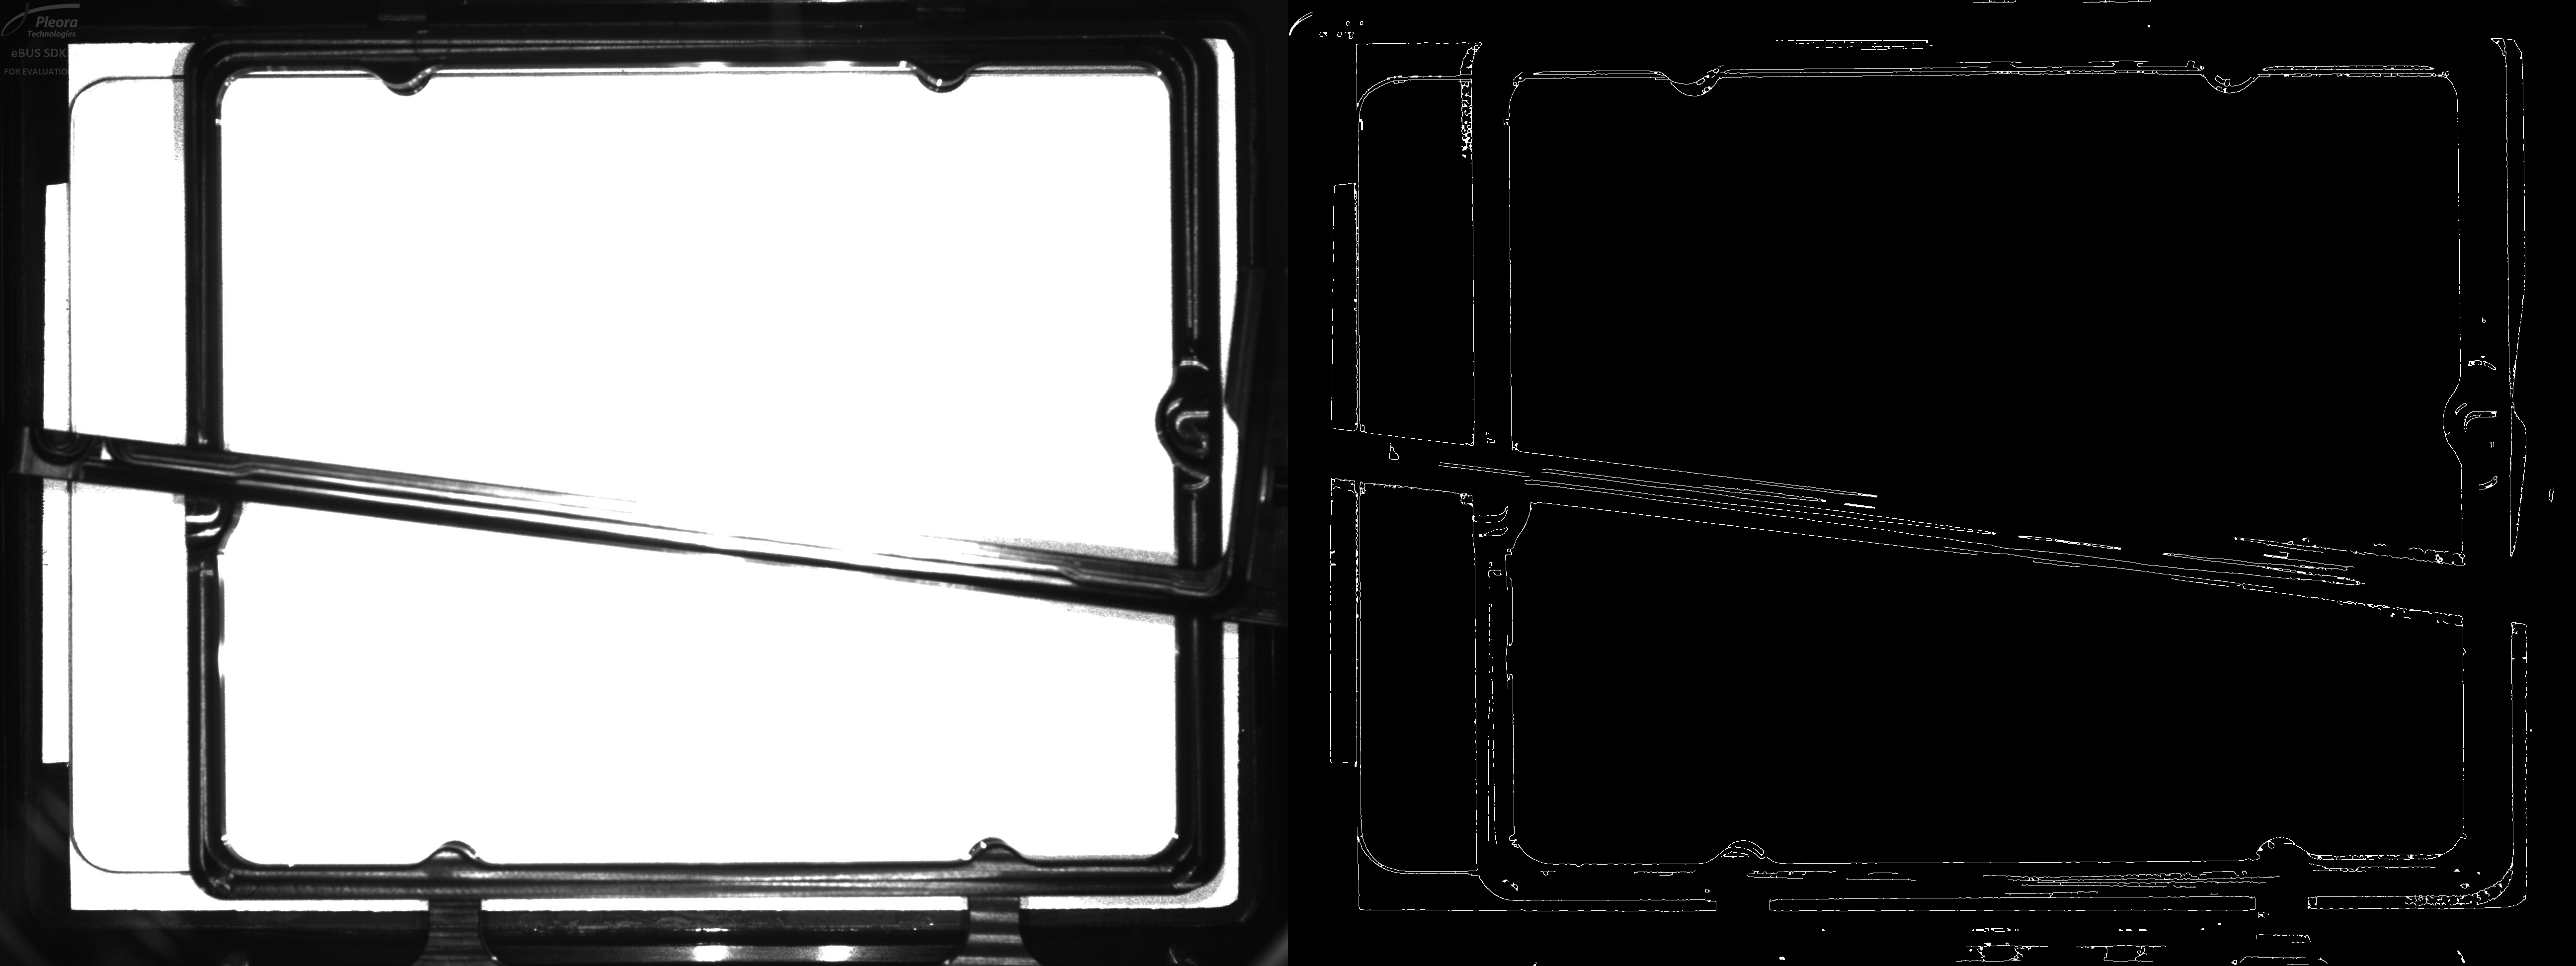

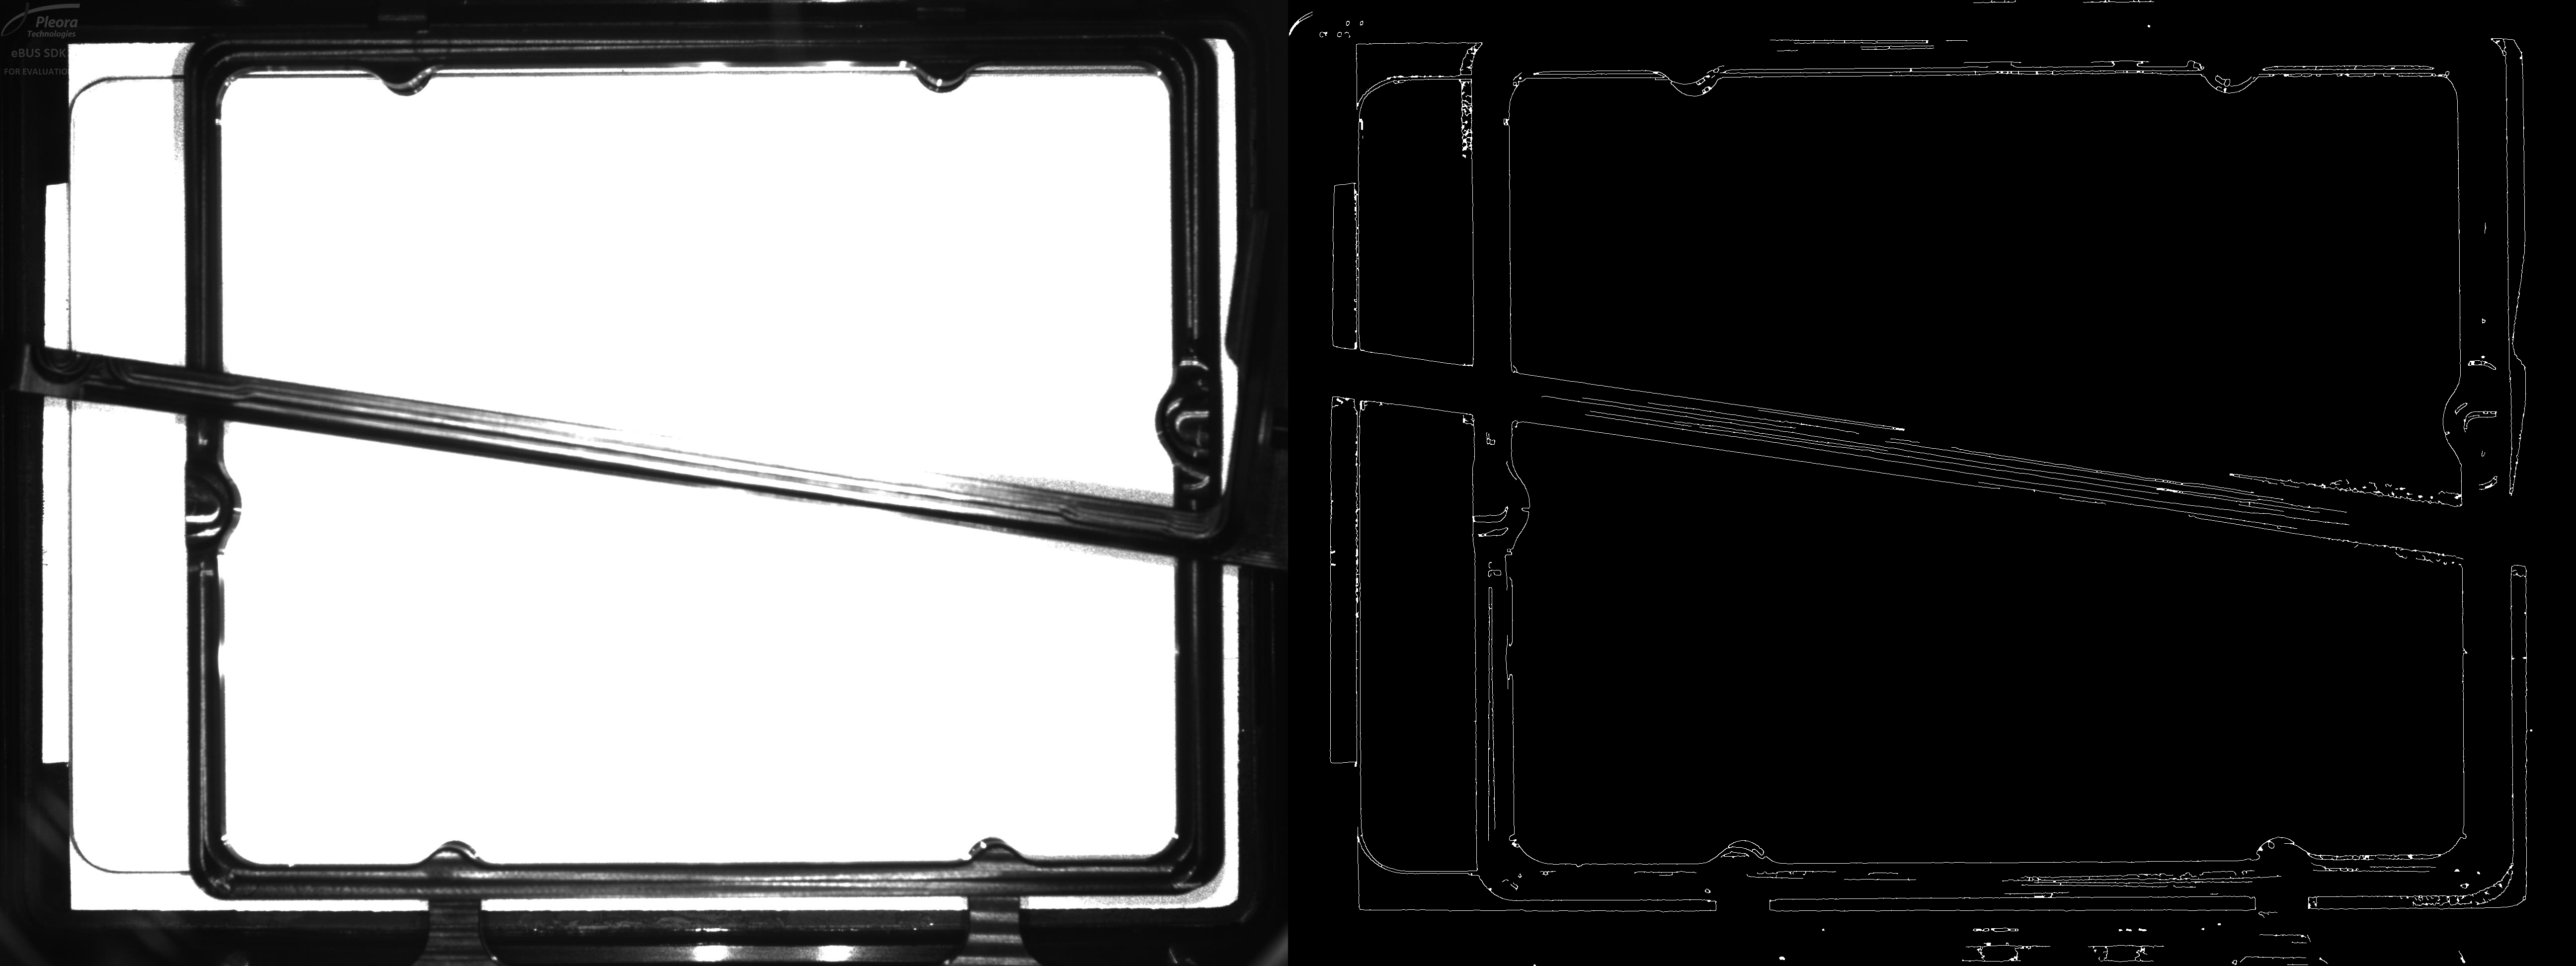

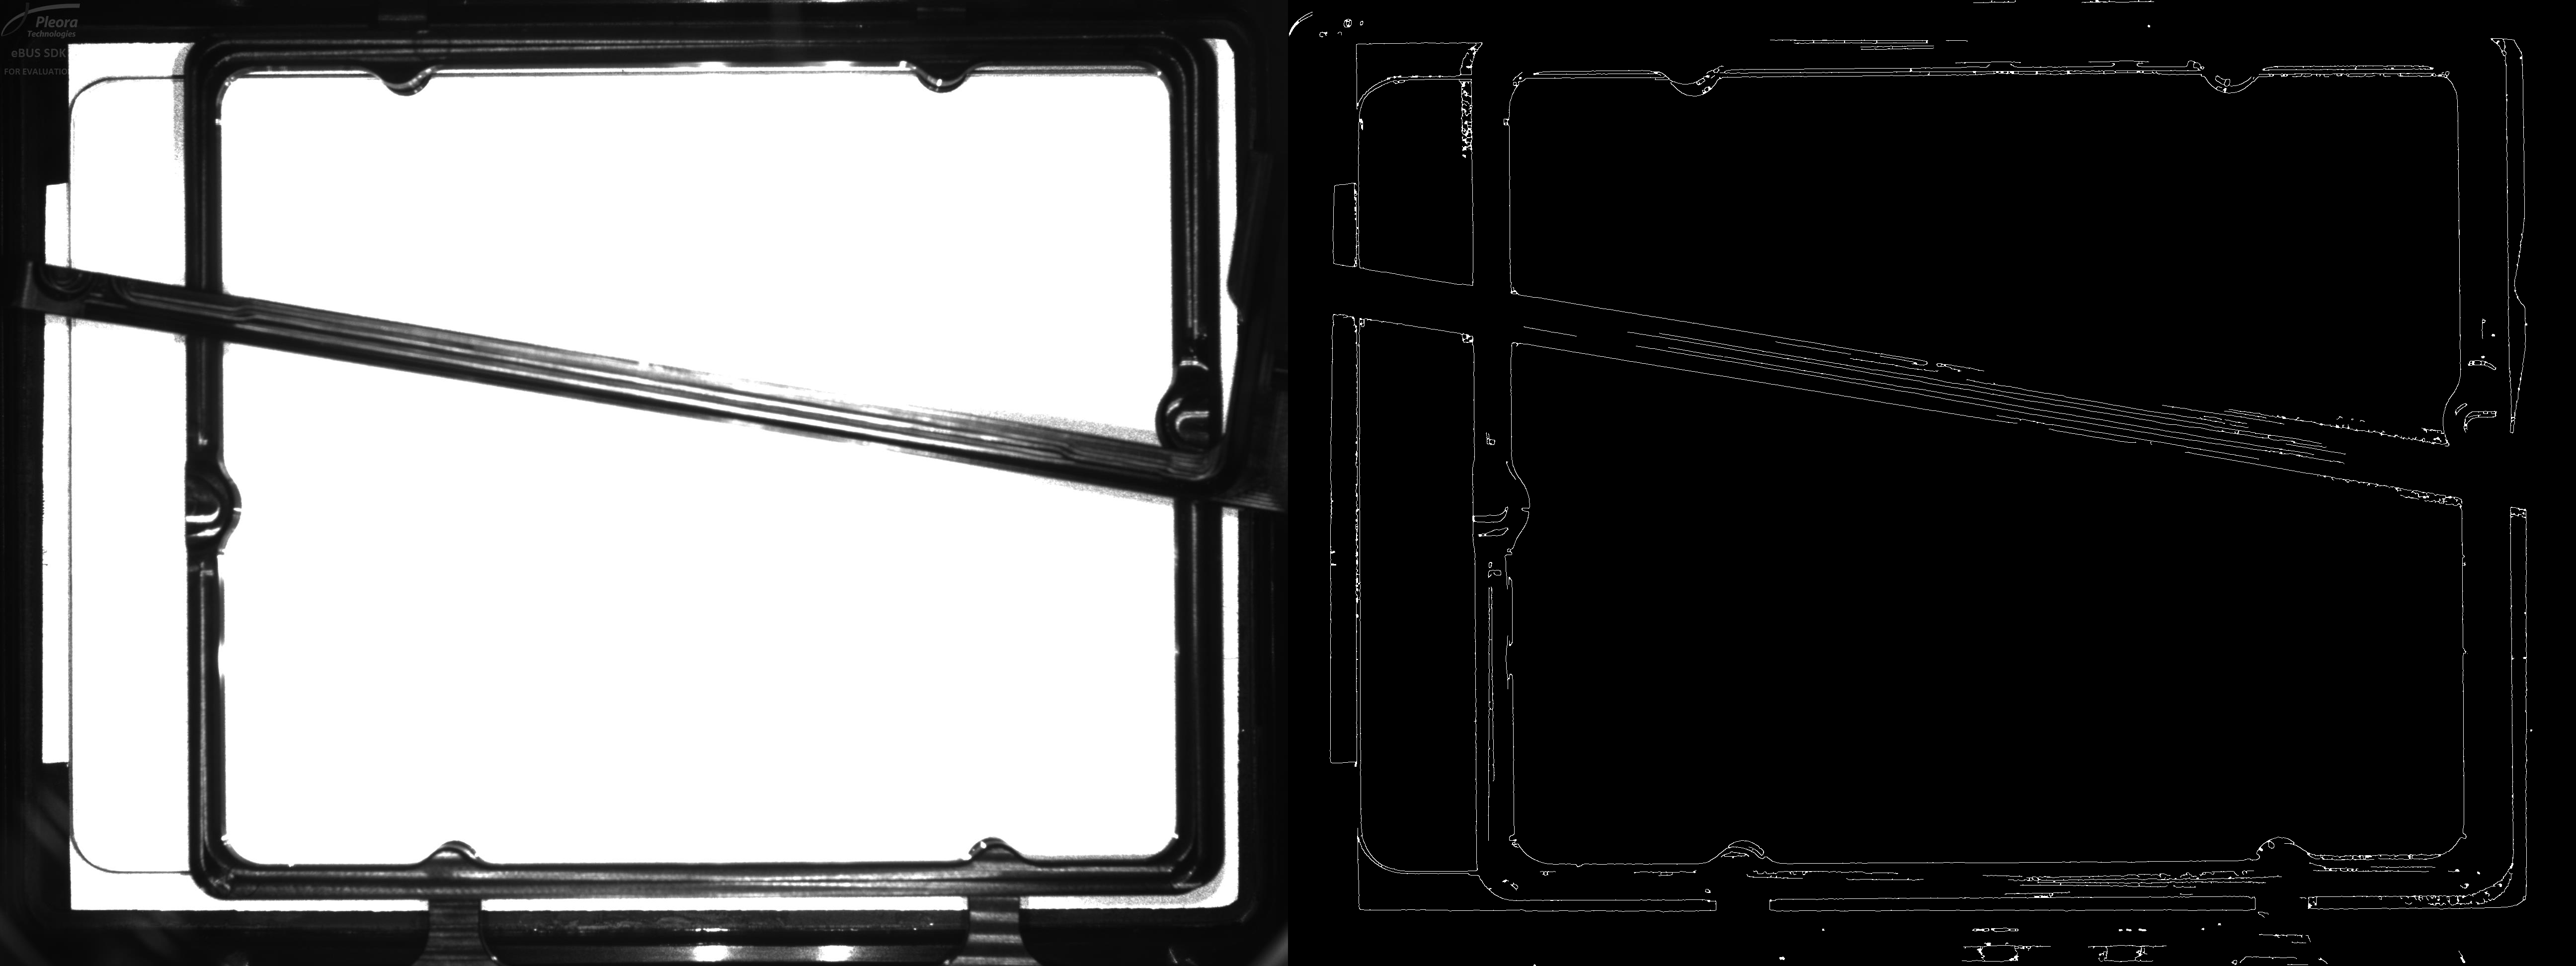

In [ ]:

if len(onlyfiles)!=len(filtered_img_files):
  raise ValueError("check that all uploaded files are images!")

vertical_concats = [np.concatenate((img_files[i], edged_images[i]), axis=1) for i in range(len(edged_images))]

for vertical_concat in vertical_concats:
  cv2_imshow(vertical_concat)



# 7- Draw edges  (gray lines) old -> (white lines) new in same image

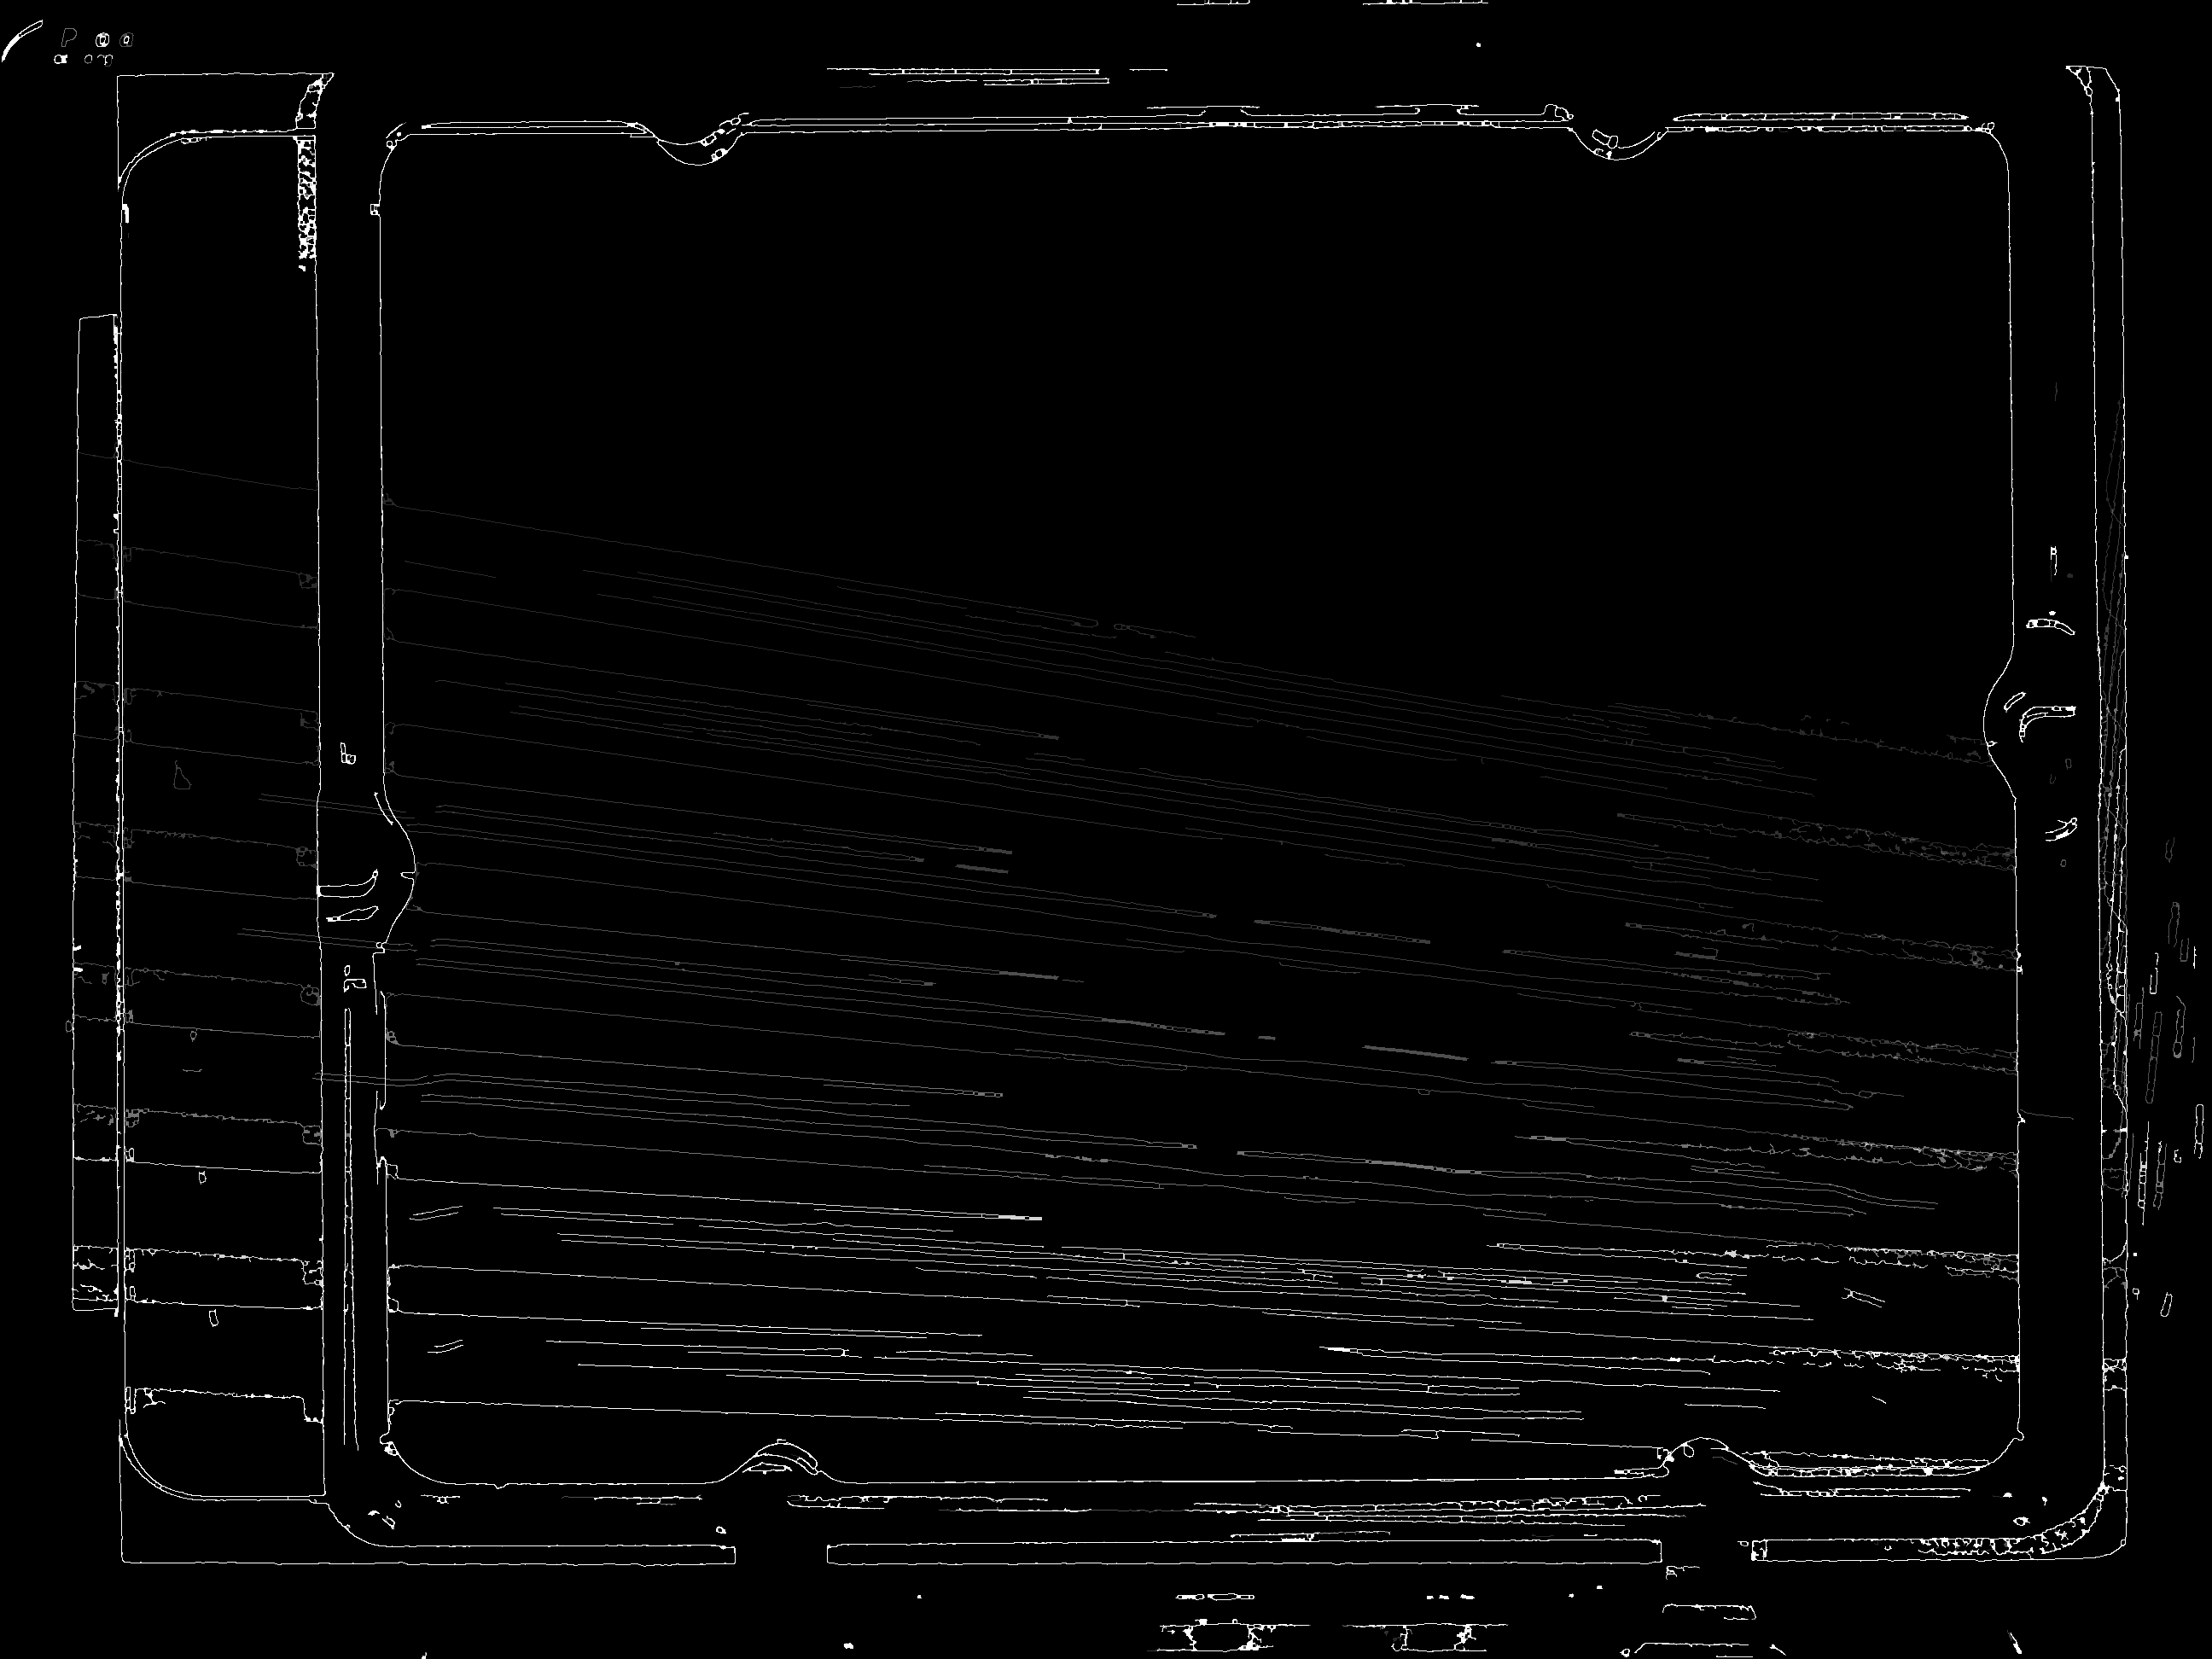

In [ ]:

overlapped_img=edged_images[0]
overlapped_img = overlapped_img.astype(np.float32)

for i in range(len(edged_images)):
  overlapped_img+=edged_images[i]/(i+0.2)
  
cv2_imshow(overlapped_img)
